<a href="https://colab.research.google.com/github/NurEser/MPA-MLF/blob/main/LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [30]:

from sklearn.model_selection import train_test_split
X = iris.data[iris.target!=2, 0:2]
y = iris.target[iris.target!=2]
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(80, 2)
(20, 2)


In [39]:

from sklearn.svm import SVC
C =200
SVMmodel=SVC(kernel='linear' )
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

In [40]:
supvectors = SVMmodel.support_vectors_
print(supvectors.shape)

(16, 2)


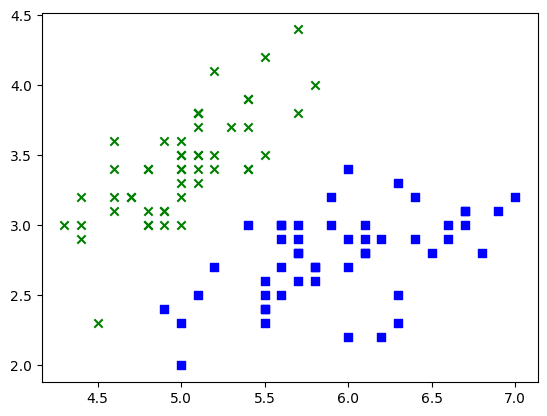

In [42]:
import matplotlib.pyplot as plt
plt.scatter(X[y==0,0], X[y==0,1], color = 'green' , marker ='x')
plt.scatter(X[y==1,0], X[y==1,1], color = 'blue' , marker ='s')
#plt.scatter(X[y==2,0], X[y==2,1], color = 'red')

In [43]:
import numpy as np
W =SVMmodel.coef_
b = SVMmodel.intercept_
xgr = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)

In [44]:

print(W[:,0])
print(W[:,1])
print(b)


[2.23360415]
[-2.28479925]
[-4.86690204]


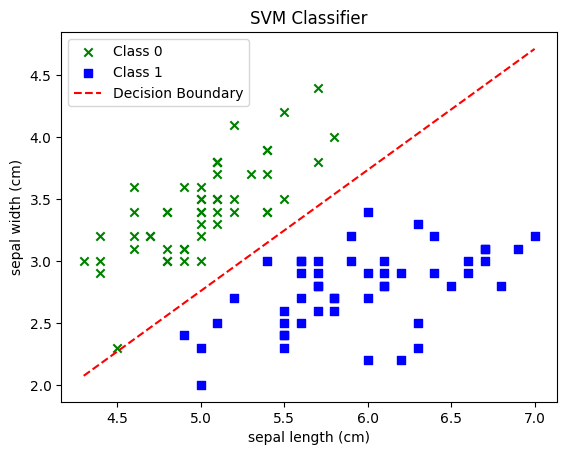

In [51]:
ygr = -W[:, 0] / W[:, 1] * xgr - b / W[:, 1]
plt.scatter(X[y==0, 0], X[y==0, 1], color='green', marker='x', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='s', label='Class 1')
plt.plot(xgr, ygr, color='red', linestyle='--', label='Decision Boundary')
#plt.scatter(xgr,ygr,s=2)
plt.title("SVM Classifier")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.legend()
plt.show()